# Netflix Dataset Project
This notebook analyzes the Netflix titles dataset with data cleaning, EDA, and hypothesis testing.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from collections import Counter

# Load dataset
df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Data Cleaning & Feature Engineering

In [10]:
# Convert date_added
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce', infer_datetime_format=True)
df['added_year'] = df['date_added'].dt.year
df['added_month'] = df['date_added'].dt.month


# Parse duration
df[['duration_num','duration_unit']] = df['duration'].str.extract(r'(\d+)\s*(\w+)')

# Split multi-labels
df['genres_list'] = df['listed_in'].str.split(', ')
df['country_list'] = df['country'].str.split(', ')

df.head()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_72636\1223061826.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce', infer_datetime_format=True)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month,duration_num,duration_unit,genres_list,country_list
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,90,min,[Documentaries],[United States]
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,2,Seasons,"[International TV Shows, TV Dramas, TV Mysteries]",[South Africa]
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,1,Season,"[Crime TV Shows, International TV Shows, TV Ac...",NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0,1,Season,"[Docuseries, Reality TV]",NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0,2,Seasons,"[International TV Shows, Romantic TV Shows, TV...",[India]


## Exploratory Data Analysis (EDA)

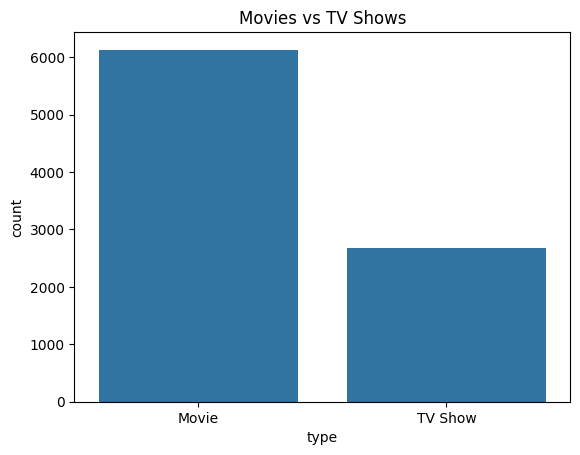

In [11]:
# Movies vs TV Shows
sns.countplot(data=df, x='type')
plt.title("Movies vs TV Shows")
plt.show()

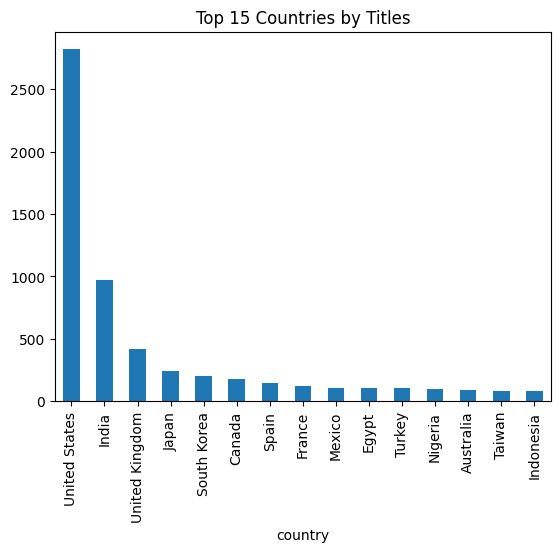

In [12]:
# Top 15 countries
df['country'].value_counts().head(15).plot(kind='bar')
plt.title("Top 15 Countries by Titles")
plt.show()

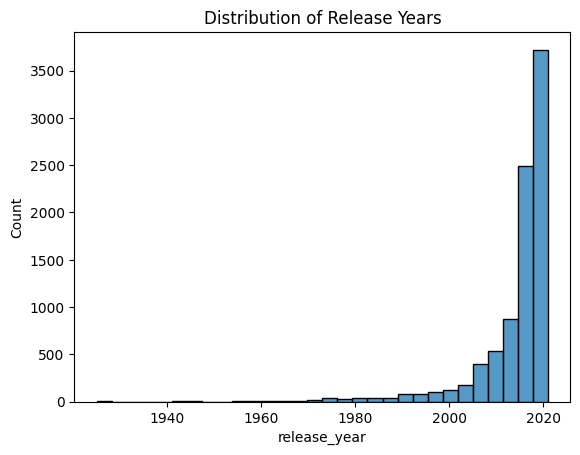

In [13]:
# Release year distribution
sns.histplot(df['release_year'], bins=30)
plt.title("Distribution of Release Years")
plt.show()

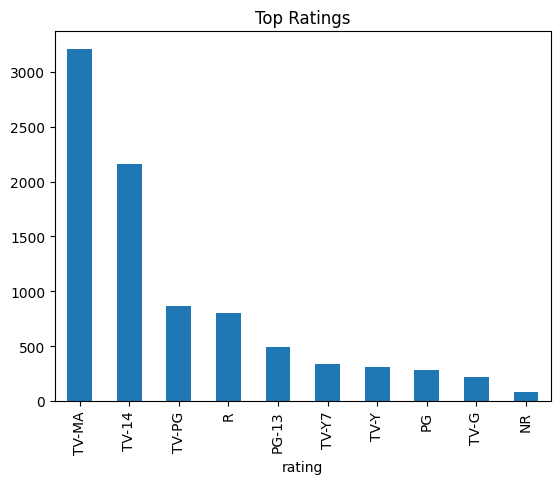

In [14]:
# Ratings
df['rating'].value_counts().head(10).plot(kind='bar')
plt.title("Top Ratings")
plt.show()

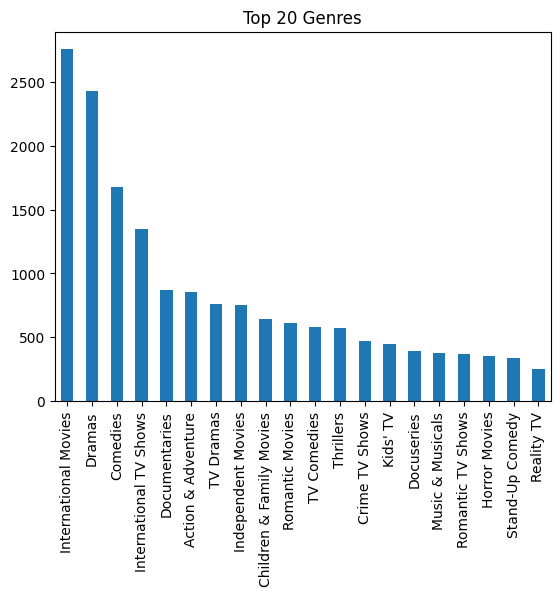

In [15]:
# Genres
genre_counts = Counter([g for sub in df['genres_list'].dropna() for g in sub])
pd.Series(genre_counts).sort_values(ascending=False).head(20).plot(kind='bar')
plt.title("Top 20 Genres")
plt.show()

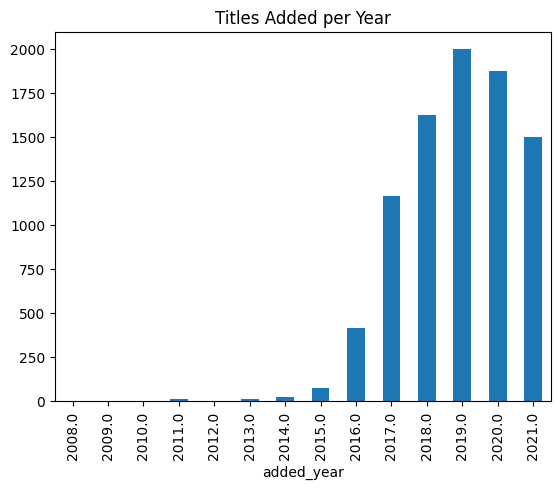

In [16]:
# Titles added per year
df['added_year'].value_counts().sort_index().plot(kind='bar')
plt.title("Titles Added per Year")
plt.show()

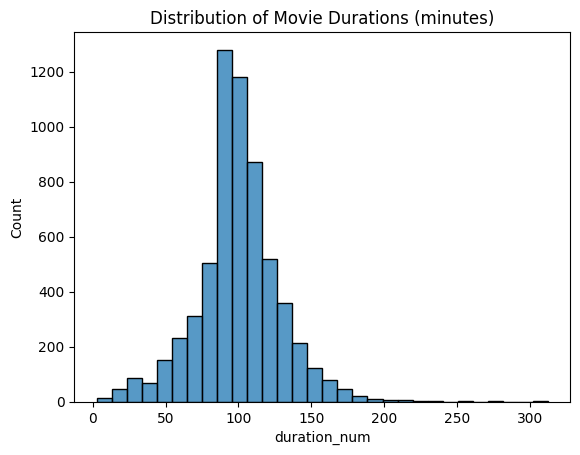

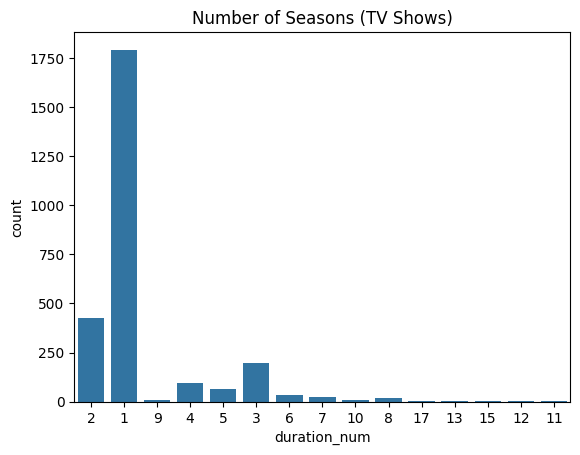

In [17]:
# Movie durations
movies = df[df['type']=="Movie"]
sns.histplot(movies['duration_num'].dropna().astype(int), bins=30)
plt.title("Distribution of Movie Durations (minutes)")
plt.show()

# TV Show durations
tvshows = df[df['type']=="TV Show"]
sns.countplot(x=tvshows['duration_num'])
plt.title("Number of Seasons (TV Shows)")
plt.show()

## Hypothesis Testing
H2: Rating distribution differs significantly between Movies and TV Shows

In [18]:
contingency = pd.crosstab(df['type'], df['rating'])
chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi-square Test Results:")
print("Chi2 statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)

Chi-square Test Results:
Chi2 statistic: 1047.6941440561634
p-value: 6.822436324208584e-213
Degrees of freedom: 16
